In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

**EDA - 1: Bike Details Dataset**

In [2]:
bike_df= pd.read_csv("BIKE DETAILS.csv")
bike_df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


**Q1: What is the range of selling prices in the dataset?**

In [3]:
bike_df['selling_price'].min(), bike_df['selling_price'].max()

(5000, 760000)

**Q2: What is the median selling price for bikes in the dataset?**

In [4]:
bike_df['selling_price'].median()

45000.0

**Q3: What is the most common seller type?**

In [5]:
bike_df['seller_type'].value_counts().idxmax()

'Individual'

**Q4: How many bikes have driven more than 50,000 kilometers?**

In [6]:
bike_df[bike_df['km_driven'] > 50000].shape[0]

170

**Q5: What is the average km_driven value for each ownership type?**

In [7]:
bike_df.groupby('owner')['km_driven'].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

**Q6: What proportion of bikes are from the year 2015 or older?**

In [8]:
(bike_df['year'] <= 2015).mean() * 100

56.64467483506126

**Q7: What is the trend of missing values across the dataset?**

In [9]:
bike_df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

**Q8: What is the highest ex_showroom_price recorded, and for which bike?**

In [10]:
max_price = bike_df['ex_showroom_price'].max()
bike_df[bike_df['ex_showroom_price'] == max_price][['name', 'ex_showroom_price']]

,name,ex_showroom_price
134,Harley-Davidson Street Bob,1278000.0


**Q9: What is the total number of bikes listed by each seller type?**

In [11]:
bike_df['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

**Q10: What is the relationship between selling_price and km_driven for first-owner bikes?**

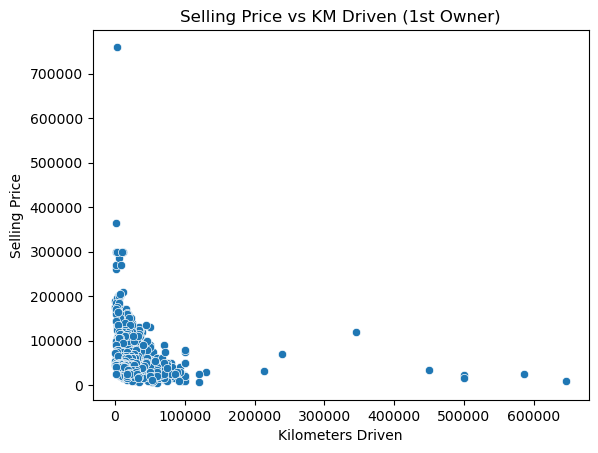

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=bike_df[bike_df['owner'] == '1st owner'], x='km_driven', y='selling_price')
plt.title("Selling Price vs KM Driven (1st Owner)")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()

**Q11: Identify and remove outliers in the km_driven column using the IQR method.**

In [13]:
Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bike_no_outliers = bike_df[(bike_df['km_driven'] >= lower_bound) & (bike_df['km_driven'] <= upper_bound)]

print(f"Original rows: {len(bike_df)}")
print(f"Rows after removing outliers: {len(bike_no_outliers)}")

Original rows: 1061
Rows after removing outliers: 1022


**Q12: Perform a bivariate analysis to visualize the relationship between year and selling_price.**

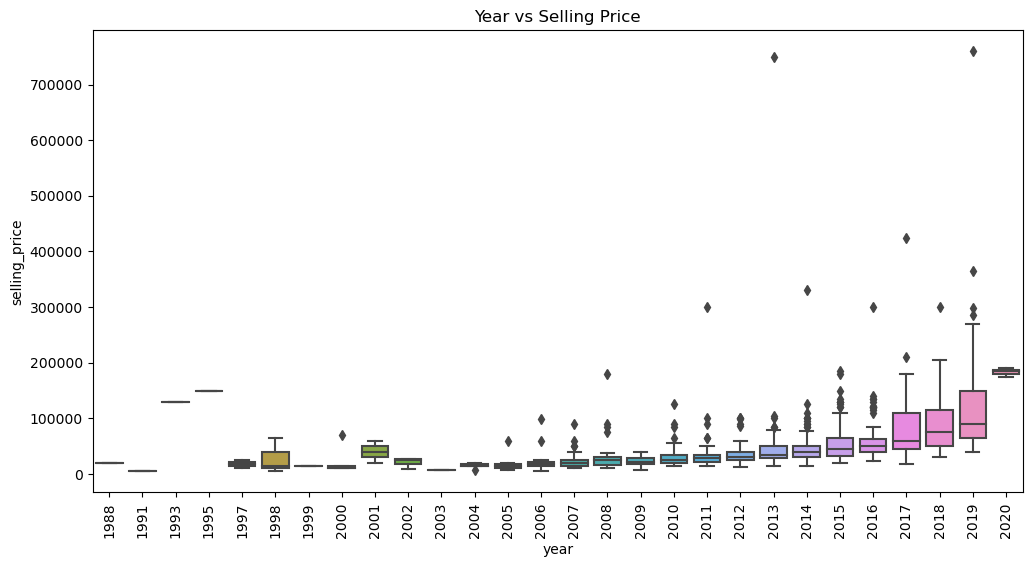

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_df, x='year', y='selling_price')
plt.xticks(rotation=90)
plt.title("Year vs Selling Price")
plt.show()

**Q13: What is the average depreciation in selling price based on the bike's age?**

In [15]:
bike_df['depreciation'] = bike_df['ex_showroom_price'] - bike_df['selling_price']
bike_df['age'] = pd.Timestamp.now().year - bike_df['year']

bike_df.groupby('age')['depreciation'].mean().dropna()

age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
24    34852.000000
Name: depreciation, dtype: float64

**Q14: Which bike names are priced significantly above the average price for their manufacturing year?**

In [16]:
avg_price_per_year = bike_df.groupby('year')['selling_price'].mean()
above_avg = bike_df[bike_df.apply(lambda row: row['selling_price'] > avg_price_per_year[row['year']], axis=1)]

above_avg['name'].unique()[:10]

array(['Royal Enfield Classic 350', 'Royal Enfield Classic Gunmetal Grey',
       'Yamaha Fazer FI V 2.0 [2016-2018]',
       'Royal Enfield Bullet 350 [2007-2011]', 'Yamaha YZF R3', 'Jawa 42',
       'Hero Honda Glamour', 'Yamaha YZF R15 S', 'Yamaha FZ25',
       'Jawa Standard'], dtype=object)

**Q15: Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

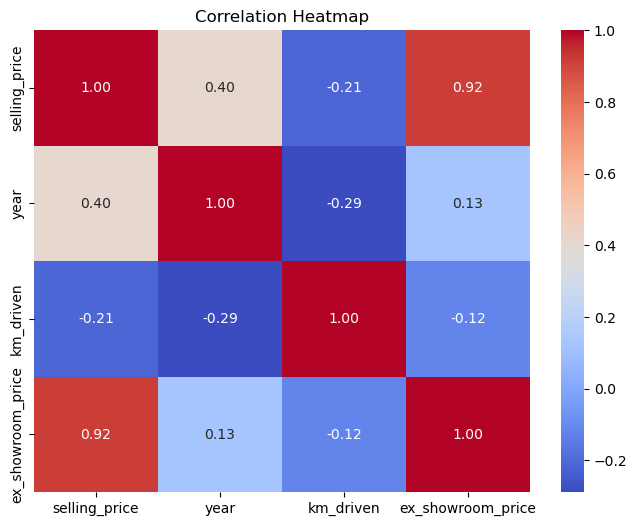

In [17]:
numeric_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
corr = bike_df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**EDA - 2: Car Sale Dataset**

In [18]:
car_df= pd.read_csv("Car Sale.csv")
car_df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


**Q1: What is the average selling price of cars for each dealer, and how does it compare across different dealers?**

In [19]:
car_df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

**Q2: Which car brand has the highest variation in prices, and what does this tell us about the pricing trends?**

In [20]:
car_df.groupby("Company")["Price ($)"].std().sort_values(ascending=False)


Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

**Q3: What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?**

In [21]:
car_df.groupby("Transmission")["Price ($)"].describe()[["25%", "50%", "75%"]]


,25%,50%,75%
Transmission,,,
Auto,19000.0,24000.0,35500.0
Manual,17000.0,22001.0,34000.0


**Q4: What is the distribution of car prices across different regions?**

In [22]:
car_df.groupby("Dealer_Region")["Price ($)"].mean().sort_values(ascending=False)


Dealer_Region
Austin        28341.603628
Aurora        28334.626837
Greenville    28180.819054
Pasco         28119.039923
Scottsdale    27954.958928
Middletown    27856.338875
Janesville    27833.350955
Name: Price ($), dtype: float64

**Q5: What is the distribution of cars based on body styles?**

In [23]:
car_df["Body Style"].value_counts()


SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: Body Style, dtype: int64

**Q6: How does the average selling price of cars vary by customer gender and annual income?**

In [24]:
car_df.groupby("Gender")[["Annual Income", "Price ($)"]].mean()


,Annual Income,Price ($)
Gender,,
Female,755973.021339,28277.265270
Male,851184.044207,28039.429407


**Q7: What is the distribution of car prices by region, and how does the number of cars sold vary by region?**

In [25]:
# Number of cars sold per region
car_df["Dealer_Region"].value_counts()

Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: Dealer_Region, dtype: int64

In [26]:
# Average price per region
car_df.groupby("Dealer_Region")["Price ($)"].mean()


Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64

**Q8: How does the average car price differ between cars with different engine sizes?**

In [27]:
car_df.groupby("Engine")["Price ($)"].mean().sort_values(ascending=False)


Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

**Q9: How do car prices vary based on the customer’s annual income bracket?**

In [28]:
car_df["Annual Income"].describe()

count    2.390600e+04
mean     8.308403e+05
std      7.200064e+05
min      1.008000e+04
25%      3.860000e+05
50%      7.350000e+05
75%      1.175750e+06
max      1.120000e+07
Name: Annual Income, dtype: float64

In [29]:
bins = [0, 50000, 100000, 250000, 500000, 1000000, float("inf")]
labels = ["<50k", "50k–100k", "100k–250k", "250k–500k", "500k–1M", ">1M"]
car_df["Income Bracket"] = pd.cut(car_df["Annual Income"], bins=bins, labels=labels)

car_df.groupby("Income Bracket")["Price ($)"].mean()


Income Bracket
<50k         27884.297820
50k–100k     43000.000000
100k–250k    28944.688889
250k–500k    28555.392229
500k–1M      28011.726423
>1M          28186.202040
Name: Price ($), dtype: float64

**Q10: What are the top 5 car models with the highest number of sales, and how does their price distribution look?**

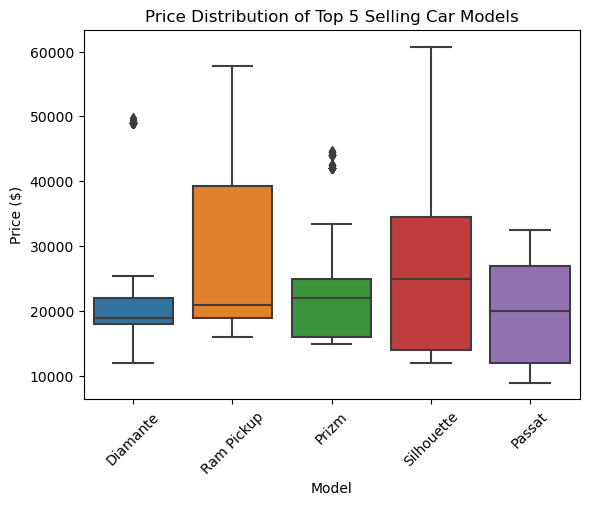

In [30]:
top5_models = car_df["Model"].value_counts().nlargest(5).index
top5_data = car_df[car_df["Model"].isin(top5_models)]

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=top5_data, x="Model", y="Price ($)")
plt.title("Price Distribution of Top 5 Selling Car Models")
plt.xticks(rotation=45)
plt.show()


**Q11: How does car price vary with engine size across different car colors, and which colors have the highest price variation?**

In [31]:
engine_color_avg = car_df.groupby(["Engine", "Color"])["Price ($)"].mean().unstack()

color_price_std = car_df.groupby("Color")["Price ($)"].std().sort_values(ascending=False)

engine_color_avg.head(), color_price_std.head()


(Color                             Black    Pale White           Red
 Engine                                                             
 DoubleÂ Overhead Camshaft  25766.451103  30347.987460  27434.392314
 Overhead Camshaft          31732.967164  24327.767694  30153.405229,
 Color
 Red           15519.360962
 Black         15286.065976
 Pale White    14077.346859
 Name: Price ($), dtype: float64)

**Q12: Is there any seasonal trend in car sales based on the date of sale?**

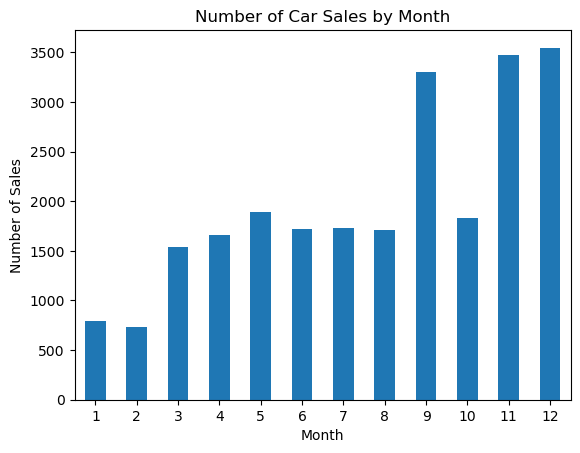

In [32]:
car_df["Date"] = pd.to_datetime(car_df["Date"])
car_df["Month"] = car_df["Date"].dt.month

car_df["Month"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=0)
plt.show()


**Q13: How does the car price distribution change when considering different combinations of body style and transmission type?**

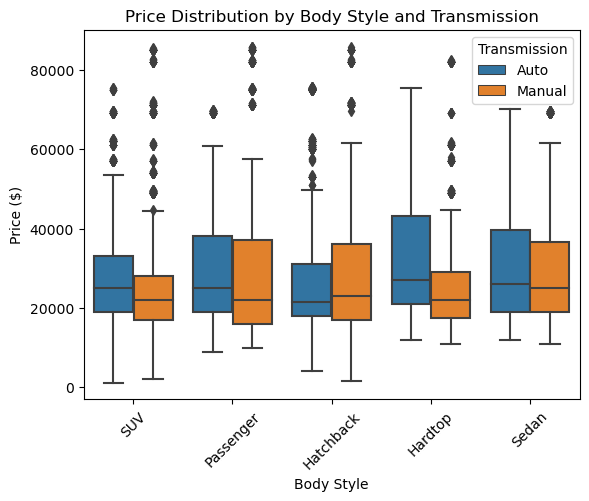

In [33]:
sns.boxplot(data=car_df, x="Body Style", y="Price ($)", hue="Transmission")
plt.title("Price Distribution by Body Style and Transmission")
plt.xticks(rotation=45)
plt.legend(title="Transmission")
plt.show()


**Q14: What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?**

In [34]:
car_df["Engine_Encoded"] = car_df["Engine"].astype('category').cat.codes

car_df[["Price ($)", "Annual Income", "Engine_Encoded"]].corr()


,Price ($),Annual Income,Engine_Encoded
Price ($),1.000000,0.012065,-0.011271
Annual Income,0.012065,1.000000,-0.006598
Engine_Encoded,-0.011271,-0.006598,1.000000


**Q15: How does the average car price vary across different car models and engine types?**

In [35]:
car_df.groupby(["Model", "Engine"])["Price ($)"].mean().unstack().fillna(0).head(10)


Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft
Model,,
3-Sep,37986.380117,0.000000
3000GT,22764.326923,21770.659864
300M,21394.888889,0.000000
323i,16744.632287,21038.162162
328i,21069.149606,38676.177215
4Runner,32167.794118,25075.416667
5-Sep,41067.000000,28071.454545
528i,46288.712963,21197.898148
A4,27070.500000,12046.220000


**EDA - 3: Amazon Sales Data**

In [36]:
amazon= pd.read_csv("amazon.csv")
amazon

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [37]:
amazon["rating"] = pd.to_numeric(amazon["rating"], errors='coerce')
#amazon["rating_count"] = pd.to_numeric(amazon["rating_count"], errors='coerce')
amazon['discount_percentage'] = (amazon['discount_percentage'].str.replace('%', '', regex=False).astype(float))
amazon['discounted_price'] = (
    amazon['discounted_price']
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

amazon['actual_price'] = (
    amazon['actual_price']
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

amazon['rating_count'] = (
    amazon['rating_count']
    .str.replace(',', '', regex=False)
    .astype(float)
)

amazon

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but th

Q1: What is the average rating for each product category?

In [38]:
avg_rating_df = (
    amazon.groupby('category')['rating']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'rating': 'avg_rating'})
)

avg_rating_df


,category,avg_rating
0,Computers&Accessories|Tablets,4.6
1,Computers&Accessories|NetworkingDevices|Networ...,4.5
2,Electronics|Cameras&Photography|Accessories|Film,4.5
3,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
4,OfficeProducts|OfficeElectronics|Calculators|B...,4.5
...,...,...
206,Computers&Accessories|Accessories&Peripherals|...,3.6
207,"Electronics|HomeTheater,TV&Video|Accessories|3...",3.5
208,Computers&Accessories|Accessories&Peripherals|...,3.5
209,Computers&Accessories|Accessories&Peripherals|...,3.4


Q2: What are the top rating_count products by category?

In [39]:
rating_count_df = (
    amazon.groupby('category')['rating_count']
    .max()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'rating': 'rating_count'})
)

rating_count_df.head(10)


,category,rating_count
0,"Electronics|HomeTheater,TV&Video|Accessories|C...",426973.0
1,"Electronics|Headphones,Earbuds&Accessories|Hea...",363713.0
2,Electronics|Mobiles&Accessories|Smartphones&Ba...,313836.0
3,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,270563.0
4,Computers&Accessories|ExternalDevices&DataStor...,253105.0
5,Electronics|Accessories|MemoryCards|MicroSD,205052.0
6,Computers&Accessories|NetworkingDevices|Networ...,179692.0
7,Electronics|Mobiles&Accessories|MobileAccessor...,178912.0
8,Computers&Accessories|Accessories&Peripherals|...,178817.0
9,Computers&Accessories|NetworkingDevices|Repeat...,156638.0


Q3: What is the distribution of discounted prices vs. actual prices?

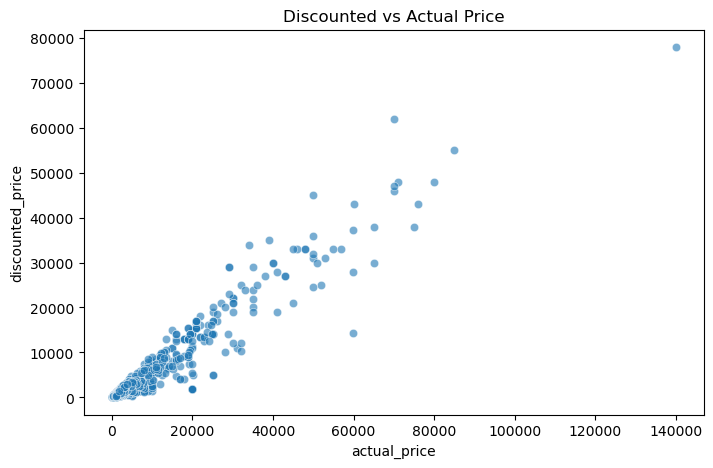

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='actual_price', y='discounted_price', data=amazon, alpha=0.6)
plt.title("Discounted vs Actual Price")
plt.show()

Q4: How does the average discount percentage vary across categories?

In [41]:
avg_discount_df = (
    amazon.groupby('category')['discount_percentage']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'rating': 'avg_discount'})
)

avg_discount_df.head(10)

,category,discount_percentage
0,Electronics|Mobiles&Accessories|MobileAccessor...,90.0
1,Computers&Accessories|Accessories&Peripherals|...,90.0
2,"Electronics|Headphones,Earbuds&Accessories|Ear...",90.0
3,"Electronics|Headphones,Earbuds&Accessories|Ada...",88.0
4,Computers&Accessories|Accessories&Peripherals|...,87.5
5,Electronics|Mobiles&Accessories|MobileAccessor...,82.0
6,Computers&Accessories|Components|InternalHardD...,80.0
7,Computers&Accessories|Accessories&Peripherals|...,78.5
8,Electronics|Mobiles&Accessories|MobileAccessor...,76.4
9,"Electronics|Headphones,Earbuds&Accessories|Cases",76.0


Q5: What are the most popular product names?

In [42]:
popular_by_ratings = amazon[['product_name','rating_count']] \
                        .sort_values(by='rating_count', ascending=False) \
                        .head(10)
print(popular_by_ratings)


                                          product_name  rating_count
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...      313832.0


Q6: What are the most popular product keywords?

In [43]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_words = " ".join(amazon['about_product'].dropna().astype(str)).lower()
words = re.findall(r'\b[a-zA-Z]+\b', all_words)
filtered_words = [w for w in words if w not in stop_words]

popular_keywords = Counter(filtered_words).most_common(20)
popular_keywords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kulde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('usb', 1230),
 ('cable', 919),
 ('warranty', 733),
 ('c', 665),
 ('charging', 662),
 ('type', 633),
 ('easy', 613),
 ('high', 603),
 ('power', 595),
 ('use', 576),
 ('devices', 574),
 ('design', 543),
 ('compatible', 488),
 ('water', 457),
 ('speed', 446),
 ('product', 446),
 ('charge', 433),
 ('fast', 424),
 ('display', 389),
 ('x', 385)]

Q7: What are the most popular product reviews?

In [44]:
popular_reviews_df = amazon['review_title'].value_counts().to_frame().reset_index()
popular_reviews_df.columns = ['review_title', 'count']
popular_reviews_df.head(10)


,review_title,count
0,"Worked on iPhone 7 and didn’t work on XR,Good ...",10
1,"Satisfied,Charging is really fast,Value for mo...",8
2,"Phone, camera, heating - works for me, may not...",8
3,"Good product,Good one,Nice,Really nice product...",7
4,"A Good Braided Cable for Your Type C Device,Go...",7
5,"Above average phone,Worth For The Money 💰,Okie...",6
6,"Fake Product,Costly but excellent quality,Stor...",6
7,It is the best tv if you are getting it in 10-...,5
8,"The metal pin is losing it's strength,Sahi h b...",5
9,"Good,Worth to buy,Great value for price,Good p...",5


Q8: What is the correlation between discounted_price and rating?

In [45]:
amazon[['discounted_price','rating']].corr()

,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


Q9: What are the Top 5 categories based on the highest ratings?

In [46]:
amazon.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64

Q10: Identify any potential areas for improvement or optimization based on the data analysis.

**EDA - 4: Spotify Data**

In [47]:
spotify= pd.read_csv("spotify.csv")
spotify

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


Q1: Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful

In [48]:
spotify.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [49]:
spotify.nunique()

Artist           115
Track Name       412
Popularity        51
Duration (ms)    410
Track ID         413
dtype: int64

In [50]:
spotify = spotify.drop_duplicates().reset_index(drop=True)
spotify

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
408,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
409,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
410,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
411,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


Q2: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

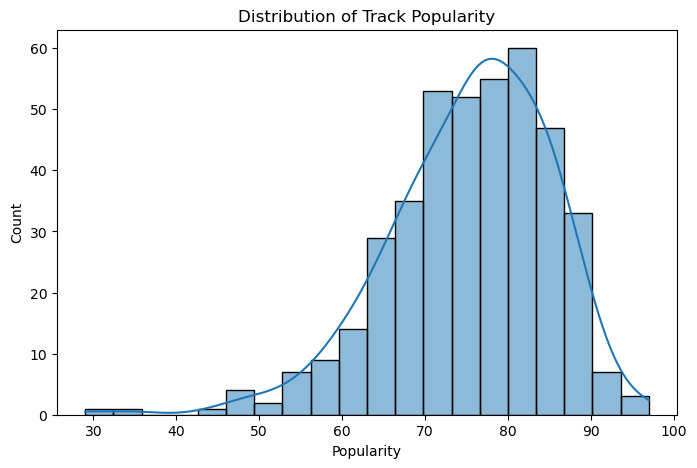

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(spotify['Popularity'], bins=20, kde=True)
plt.title("Distribution of Track Popularity")
plt.show()

Q3: Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

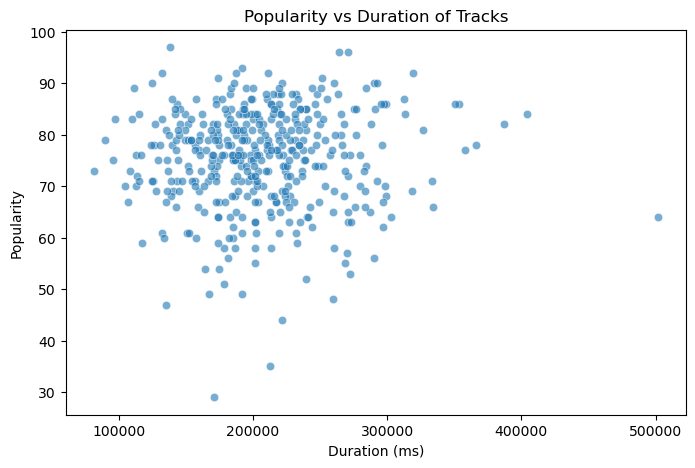

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=spotify, alpha=0.6)
plt.title("Popularity vs Duration of Tracks")
plt.show()

Q4: Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

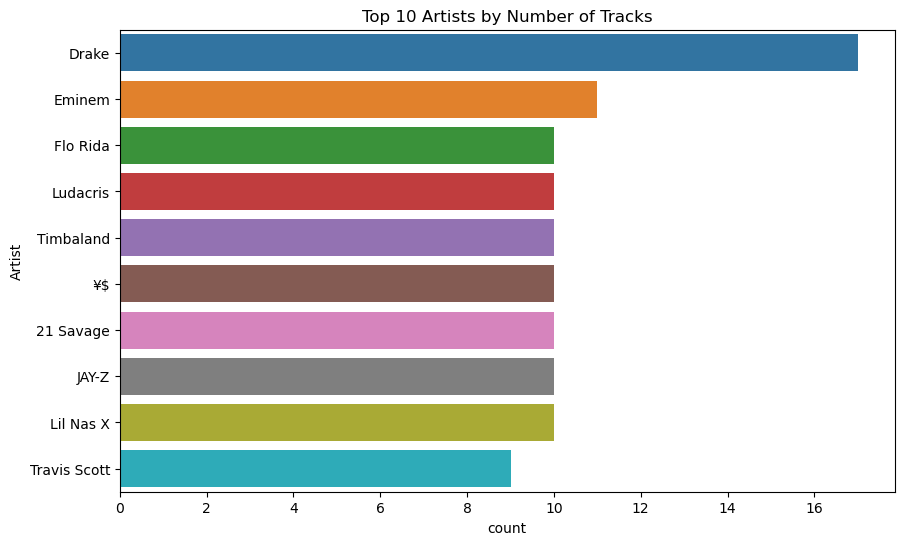

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(y='Artist', data=spotify, order=spotify['Artist'].value_counts().head(10).index)
plt.title("Top 10 Artists by Number of Tracks")
plt.show()

Q5: What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [54]:
least_popular = spotify.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
least_popular

,Artist,Track Name,Popularity
199,Pressa,Attachments (feat. Coi Leray),29
219,Justin Bieber,Intentions,35
390,French Montana,Splash Brothers,44
213,Lil Baby,On Me - Remix,47
384,Wyclef Jean,911 (feat. Mary J. Blige),48


Q6: Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [55]:
top5_artists = spotify['Artist'].value_counts().head(5).index
avg_popularity = spotify[spotify['Artist'].isin(top5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
avg_popularity

Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64

Q7: For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [56]:
top_tracks = spotify[spotify['Artist'].isin(top5_artists)].sort_values(['Artist','Popularity'], ascending=[True,False]).groupby('Artist').head(1)
top_tracks[['Artist','Track Name','Popularity']]

,Artist,Track Name,Popularity
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
75,Eminem,Without Me,90
282,Flo Rida,Low (feat. T-Pain),84
348,Ludacris,My Chick Bad,67
357,Timbaland,The Way I Are,85


Q8: Visualize relationships between multiple numerical variables simultaneously using a pair plot

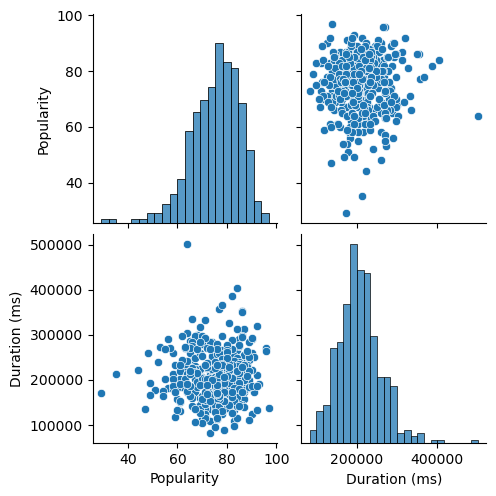

In [57]:
sns.pairplot(spotify[['Popularity','Duration (ms)']])
plt.show()

Q9: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

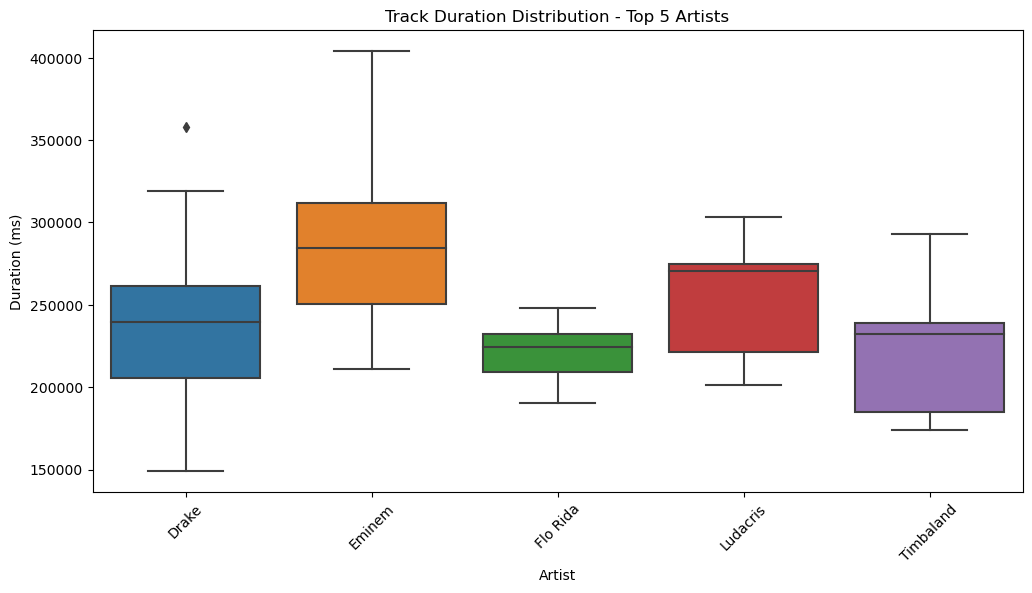

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Artist', y='Duration (ms)', data=spotify[spotify['Artist'].isin(top5_artists)])
plt.xticks(rotation=45)
plt.title("Track Duration Distribution - Top 5 Artists")
plt.show()

Q10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

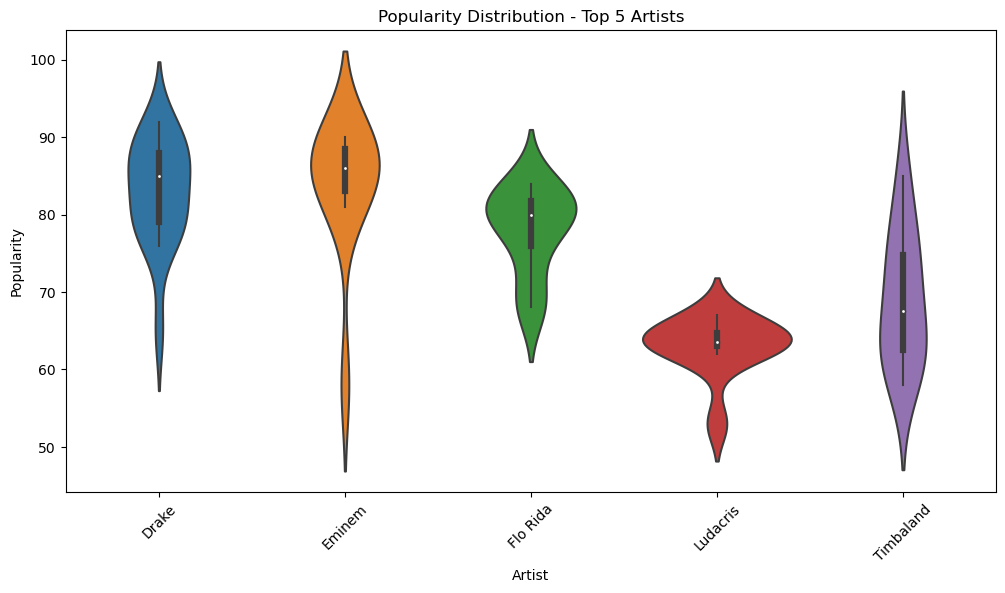

In [59]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Artist', y='Popularity', data=spotify[spotify['Artist'].isin(top5_artists)])
plt.xticks(rotation=45)
plt.title("Popularity Distribution - Top 5 Artists")
plt.show()

# --------------------- Thank You ----------------------